# **DataFun P6**

# **Exploring the Diamonds Dataset: Analyzing Price, Quality, and Carat Trends**

## **I. Introduction**
The diamond industry is driven by factors such as **carat, cut, color, and clarity**, all of which influence a diamond’s price. This report explores the **Seaborn diamonds dataset**, which contains detailed characteristics of over **50,000 diamonds**, including their physical attributes and pricing. By analyzing these variables, we can identify patterns in diamond pricing, quality distributions, and potential correlations between features.

This study will assess:  
- How **carat weight impacts price** and whether larger diamonds follow a predictable pricing pattern.  
- The role of **cut, color, and clarity** in determining a diamond’s value.  
- The relationship between **depth and table percentages** and overall price trends.  
- Whether **certain attributes are more strongly correlated with price** than others.  

To enhance our analysis, we will visualize key trends using scatter plots, box plots, and correlation heatmaps. Additionally, we will explore **multivariate relationships** to see how multiple factors interact to influence price.

### **Methodology & Tools**
This analysis will be conducted in **Python** within a Jupyter Notebook environment, leveraging the following libraries:  
- **Pandas** for data loading, manipulation, and filtering.  
- **Matplotlib & Seaborn** for data visualization (scatter plots, box plots, heatmaps).  
- **NumPy** for numerical operations and calculations.  
- **Scikit-learn** (optional) for potential regression modeling to predict price based on features.

### **Dataset Overview**
- **Source**: Seaborn diamonds dataset  
- **Format**: CSV  
- **Format**: Link: https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/diamonds.csv
- **Variables**:  
  - `carat` (weight of the diamond)  
  - `cut` (Fair, Good, Very Good, Premium, Ideal)  
  - `color` (ranging from D (best) to J (worst))  
  - `clarity` (level of inclusions)  
  - `depth`, `table`, `x`, `y`, `z` (physical dimensions)  
  - `Cost` (in USD; originally labeled "Price") 

### **Key Analysis Goals**
- **Identify the strongest predictors of price**  
- **Visualize relationships between diamond characteristics**  
- **Analyze the distribution of diamond attributes**  
- **Explore potential anomalies or outliers in pricing**  

By leveraging data visualization and statistical exploration, this analysis aims to provide **actionable insights into the diamond market**, helping to understand the key drivers of diamond pricing and quality classification.


In [109]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## **Step 1: Loading Data**

Load the diamonds dataset using Seaborn's built-in function or from a local CSV file.

In [110]:
diamonds = sns.load_dataset('diamonds')
# Or, if using a local CSV:
# diamonds = pd.read_csv('data/diamonds.csv')

## **Step 2: Initial Data Inspection**

In [111]:
diamonds.head(10)
diamonds.shape
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

## **Step 3: Descriptive Statistics**

Get a summary of the dataset with descriptive statistics for numerical columns to understand their distribution.

In [112]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## **Step 4: Data Distribution for Numerical Columns**

Visualize the distribution of numerical columns (e.g., `price`, `carat`) using histograms.

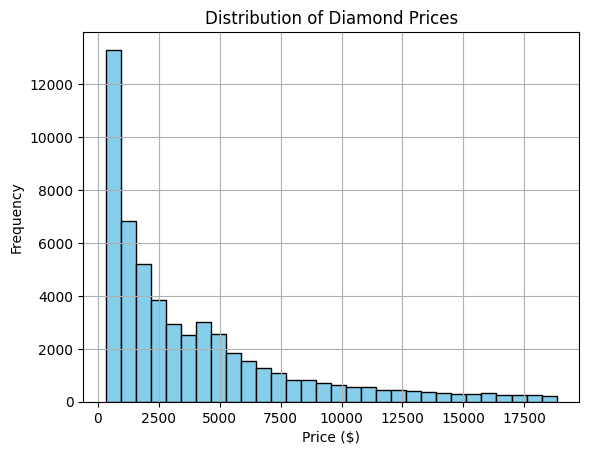

In [113]:
diamonds['price'].hist(bins=30, color='skyblue', edgecolor='black')  # Add color and bins if desired
plt.xlabel('Price ($)')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.title('Distribution of Diamond Prices')  # Title for the plot
plt.show()

### Observation
The histogram for the carat column reveals a right-skewed distribution. This indicates that most diamonds in the dataset are of smaller carat weights, with fewer larger diamonds contributing to the tail on the right side. The presence of bars on the left side suggests that there are more diamonds with lower carat values, which is typical in many datasets involving prices or sizes where higher values are less frequent.

## **Step 5: Data Distribution for Categorical Columns**

Examine the distribution of categorical columns (e.g., `cut`, `color`, `clarity`) using count plots.

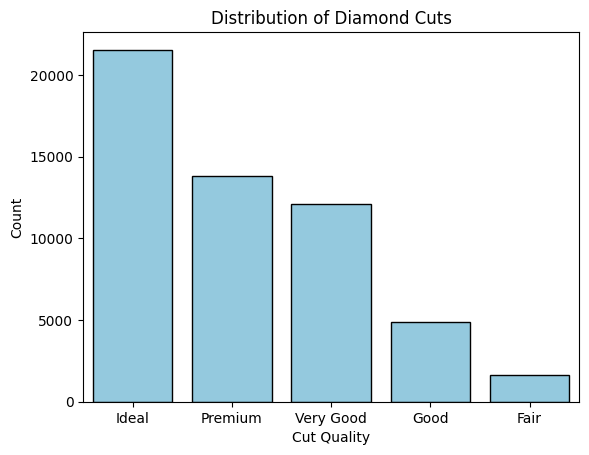

In [114]:
sns.countplot(x='cut', data=diamonds, color='skyblue', edgecolor='black')  # Add color and border
plt.xlabel('Cut Quality')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.title('Distribution of Diamond Cuts')  # Title for the plot
plt.show()

### Observation
The countplot for the 'cut' column shows that the majority of diamonds in the dataset are classified as 'Ideal,' followed by 'Premium,' 'Very Good,' 'Good,' and 'Fair.' This suggests that diamonds with higher-quality cuts are more prevalent, while 'Fair' cuts are the least common. This distribution may reflect consumer preferences, as diamonds with better cuts are generally more sought after and valued. The cut of a diamond is also an attribute that can be controlled during the manufacturing process, so it's logical that the majority of diamonds are classified as 'Ideal.'

## **Step 6: Data Transformation and Feature Engineering**

Rename columns and add new features if necessary for further analysis.


In [115]:
diamonds.rename(columns={'price': 'cost'}, inplace=True)
diamonds['price_per_carat'] = diamonds['cost'] / diamonds['carat']


## **Step 7: Initial Visualizations**

Create various visualizations to explore the relationships between features (e.g., scatter plots, box plots).


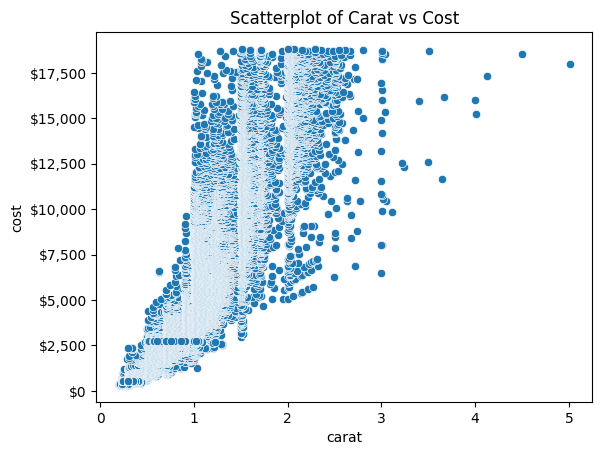

In [116]:
import matplotlib.ticker as mtick

sns.scatterplot(x='carat', y='cost', data=diamonds)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.title('Scatterplot of Carat vs Cost')  # Title added here
plt.show()

### Observation
The scatterplot reveals that the cost of diamonds tends to be lower for those with carat weights closer to 0, with a noticeable increase in cost as carat weight rises, particularly between the 1 to 3 carat range. This trend suggests that larger diamonds, which generally possess more weight, are priced higher, likely due to their rarity and desirability in the market.

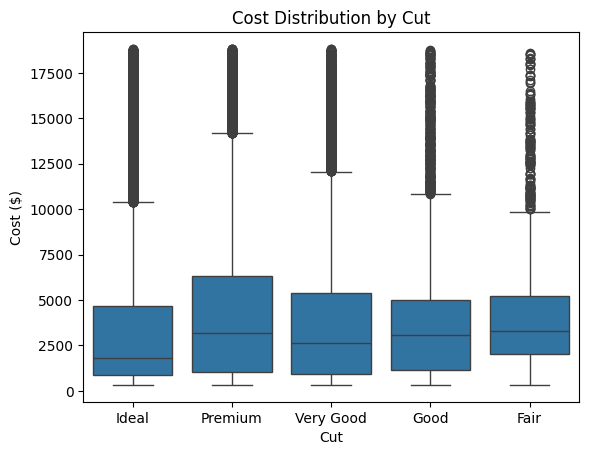

In [117]:
# Boxplot of price distribution by cut
sns.boxplot(x='cut', y='cost', data=diamonds)
plt.title('Cost Distribution by Cut')
plt.ylabel('Cost ($)')
plt.xlabel('Cut')
plt.show()


### Observation
The boxplot shows the cost distribution of diamonds by cut quality. Median prices are relatively similar across all categories, but there are many high-cost outliers, especially in the Fair cut. The data is right-skewed, indicating that a few very expensive diamonds drive up the price range. Surprisingly, lower-quality cuts like Fair have a wider spread and more extreme outliers than higher-quality cuts like Ideal or Premium.

In [118]:
# Calculate correlation matrix
correlation_matrix = diamonds.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Diamond Features')
plt.show()

ValueError: could not convert string to float: 'Ideal'